<a href="https://colab.research.google.com/github/abasnezhad/Kaggle/blob/main/120_years_of_Olympic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dfa= pd.read_csv('athlete_events.csv')
dfr=pd.read_csv('noc_regions.csv')

In [8]:
dfa.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
146801,73687,Luigi Maiocco,M,19.0,NaN,NaN,Italy,ITA,1912 Summer,1912,Summer,Stockholm,Gymnastics,Gymnastics Men's Team All-Around,Gold
161631,81143,Juan Manuel Molina Morote,M,29.0,173.0,67.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 20 kilometres Walk,NaN
205791,103294,Nils Rudolph,M,26.0,195.0,87.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Men's 50 metres Freestyle,NaN


In [41]:
dfa.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.000000,102097.25,135571.0
Age,271116.0,25.556898,6.280857,10.0,22.0,25.000000,28.00,97.0
Height,271116.0,175.338970,9.278100,127.0,170.0,175.338970,180.00,226.0
Weight,271116.0,70.702393,12.574690,25.0,63.0,70.702393,75.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.000000,2002.00,2016.0


In [10]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [12]:
dfa.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [19]:
# replacing NAN with mean
dfa['Age'].fillna(dfa['Age'].mean(), inplace= True)
dfa['Height'].fillna(dfa['Height'].mean(), inplace= True)
dfa['Weight'].fillna(dfa['Weight'].mean(), inplace= True)

In [21]:
# merging 2 dfs
combined= pd.merge(dfa, dfr, on= 'NOC', how= 'left')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Gold Medals')

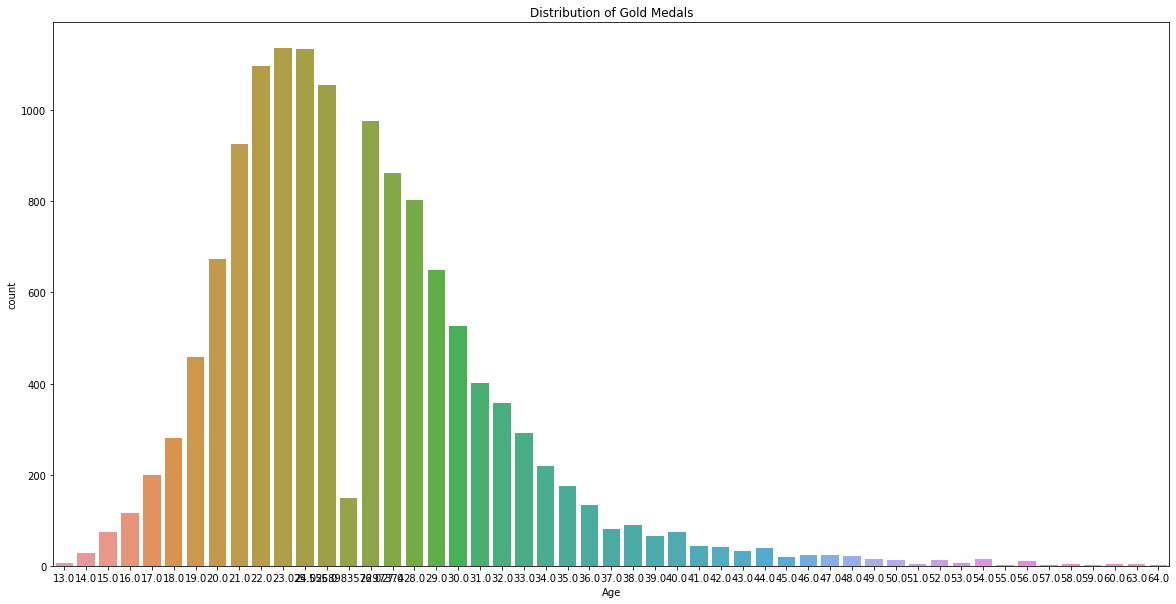

In [24]:
# gold medalists
gold_medalists= combined[combined['Medal']=='Gold']
# gold_medalists = gold_medalists[np.isfinite(goldMedals['Age'])] / non NAN age gold medalists


# gold medal destribuition  over Age 
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(gold_medalists['Age'])
plt.title('Distribution of Gold Medals')


In [29]:
# number of gold medalists older than 50

len(gold_medalists[gold_medalists['Age']>50])
#gold_medalists['ID'][gold_medalists['Age'] > 50].count()

65

In [36]:
# sports of senior gold medalists
gold_medalists['Sport'][gold_medalists['Age']>50].value_counts()

Equestrianism       18
Sailing             12
Shooting            11
Archery             11
Art Competitions     8
Curling              2
Alpinism             1
Roque                1
Croquet              1
Name: Sport, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gold Medals for Athletes Over 50')

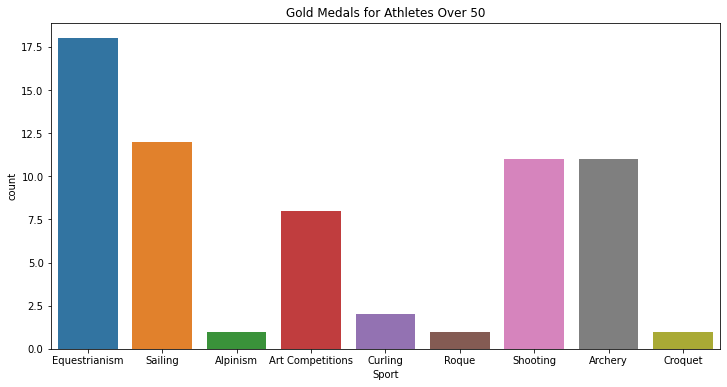

In [39]:
plt.figure(figsize=(12, 6))
plt.tight_layout()
sns.countplot(gold_medalists['Sport'][gold_medalists['Age']>50])
plt.title('Gold Medals for Athletes Over 50')

Text(0.5, 1.0, 'Women medals per edition of the Games')

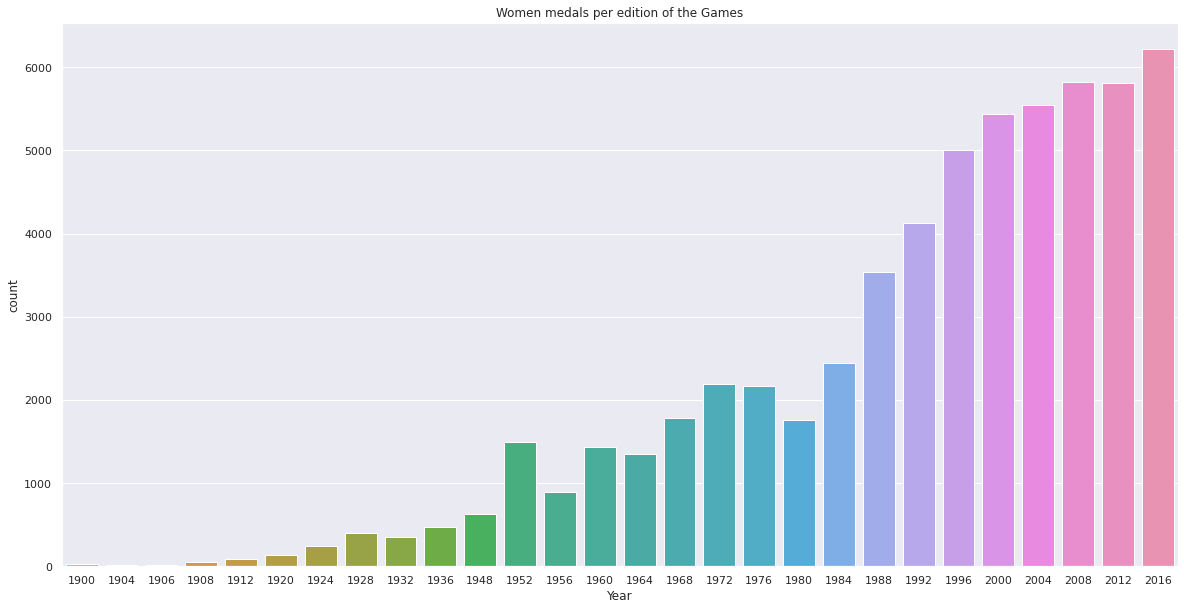

In [44]:
# women in summer olympic
women= combined[(combined['Sex']=='F') & (combined['Season']=='Summer')]

# women participation in olympic over time
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=women)
plt.title('Women medals per edition of the Games')



In [52]:
# woemn olympian in 2000

women.loc[women['Year']==2000].sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
32979,16970,"Jennifer ""Jen"" Button",F,22.0,163.0,55.0,Canada,CAN,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,Canada,NaN
58251,29805,Anne-Sophie Doyen,F,16.0,173.0,51.0,France,FRA,2000 Summer,2000,Summer,Sydney,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,NaN,France,NaN
79532,40393,Crystal Gilmore,F,17.0,136.0,47.0,Canada,CAN,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,NaN,Canada,NaN


In [53]:
# number of woemn olympian in 2000
women['ID'][women['Year']==2000].count()


5431

In [63]:
# medals per country 
combined.groupby(["region"])['Medal'].count().sort_values(ascending=False)[:5]

region
USA        5637
Russia     3947
Germany    3756
UK         2068
France     1777
Name: Medal, dtype: int64

In [95]:
# to 5 goldmedalist countries
top5_gold_region=gold_medalists["region"].value_counts().reset_index(name='Medal')[:5]
top5_gold_region

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


Text(0.5, 1.0, 'Medals per Country')

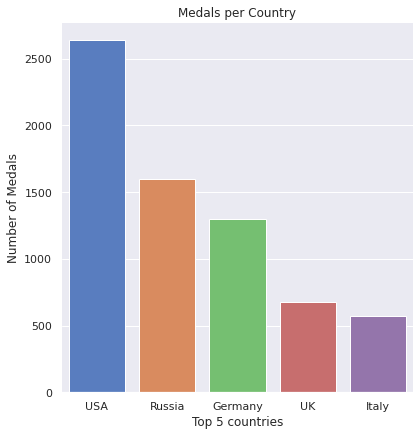

In [96]:
# plot
g = sns.catplot(x="index", y="Medal", data=top5_gold_region,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

In [105]:
# us goldiest sport
gold_medalists[gold_medalists['region']=='USA']['Event'].value_counts().reset_index(name='medal')[:1]

,index,medal
0,Basketball Men's Basketball,186


In [109]:
# weather this is number of team gold medal or individual gold medal

gold_medalists[(gold_medalists['region']=='USA') & (gold_medalists['Sport']=='Basketball') & (gold_medalists['Sex']=='M')].sort_values(by='Year')[:5]

# it is the individual medals then!


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
109529,55375,Francis Lee Johnson,M,25.0,180.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
143383,71965,Frank John Lubin,M,26.0,200.0,113.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
161770,81220,"Arthur Owen ""Art"" Mollner",M,23.0,183.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
79052,40143,"John Haskell ""Tex"" Gibbons",M,28.0,185.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
189347,95095,"Donald Arthur ""Don"" Piper",M,25.0,180.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN


In [112]:
# number of team gold medal in Basketball

gold_medalists[(gold_medalists['region']=='USA') & (gold_medalists['Sport']=='Basketball') & (gold_medalists['Sex']=='M')].groupby(['Year']).first()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,region,notes
Year,,,,,,,,,,,,,,,,
1936,7396,"Samuel J. ""Sam"" Balter, Jr.",M,26.0,178.0,68.0,United States,USA,1936 Summer,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,None
1948,7881,"Clifford Eugene ""Cliff"" Barker",M,27.0,188.0,84.0,United States,USA,1948 Summer,Summer,London,Basketball,Basketball Men's Basketball,Gold,USA,None
1952,13302,"Ronald Yngve ""Ron"" Bontemps",M,25.0,188.0,79.0,United States,USA,1952 Summer,Summer,Helsinki,Basketball,Basketball Men's Basketball,Gold,USA,None
1956,14153,"Richard James ""Dick"" Boushka",M,22.0,195.0,95.0,United States,USA,1956 Summer,Summer,Melbourne,Basketball,Basketball Men's Basketball,Gold,USA,None
1960,5212,Jay Joseph Hoyland Arnette,M,21.0,188.0,79.0,United States,USA,1960 Summer,Summer,Roma,Basketball,Basketball Men's Basketball,Gold,USA,None
1964,7958,"Velvet James ""Jim"" Barnes",M,23.0,201.0,109.0,United States,USA,1964 Summer,Summer,Tokyo,Basketball,Basketball Men's Basketball,Gold,USA,None
1968,8104,"Michael Thomas ""Mike"" Barrett",M,25.0,188.0,73.0,United States,USA,1968 Summer,Summer,Mexico City,Basketball,Basketball Men's Basketball,Gold,USA,None
1976,5173,"Michel Taylor ""Tate"" Armstrong",M,20.0,190.0,77.0,United States,USA,1976 Summer,Summer,Montreal,Basketball,Basketball Men's Basketball,Gold,USA,None
1984,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold,USA,None


Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

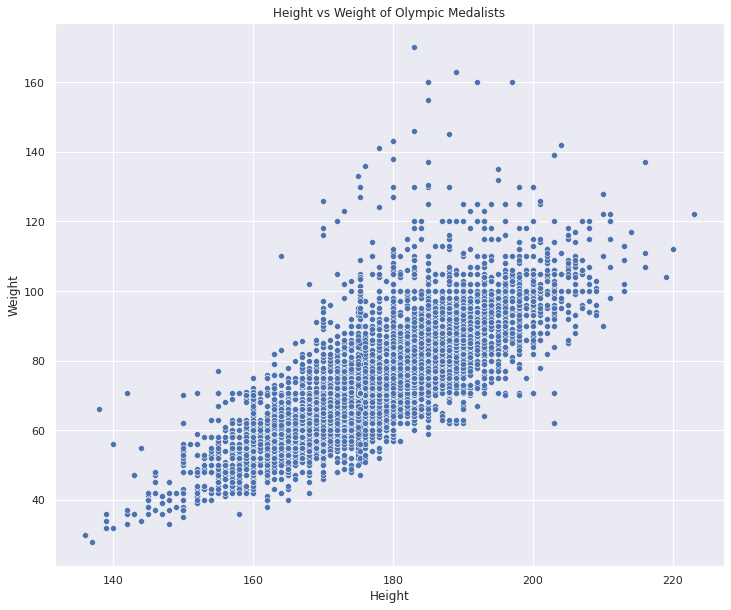

In [113]:


plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=gold_medalists)
plt.title('Height vs Weight of Olympic Medalists')



Text(0.5, 1.0, 'Variation of Male Athletes over time')

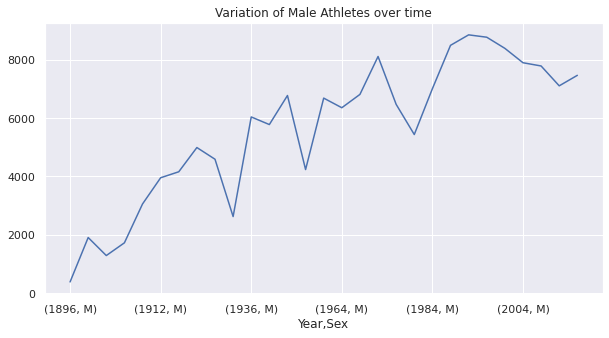

In [123]:
# male participation over time 
men= combined[(combined['Sex']=='M') & (combined['Season']=='Summer')]


men_grouped = men.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(10, 5))
men_grouped.plot()
plt.title('Variation of Male Athletes over time')



Text(0.5, 1.0, 'Variation of Female Athletes over time')

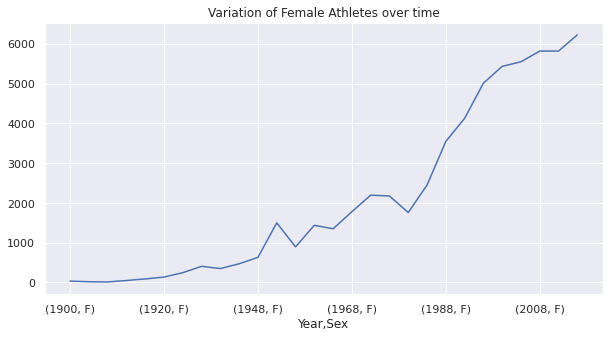

In [125]:
# female participation over time 
women_grouped = women.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(10, 5))
women_grouped.plot()
plt.title('Variation of Female Athletes over time')